In [ ]:

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Verificação da quantidade ideal de clusters


In [ ]:
# Conectar ao banco de dados
db_path = "/content/mercado_livre.db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Tabelas disponíveis no banco
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tabelas disponíveis:", tables)

# Carregar dados
query = "SELECT * FROM produtos"
dfr = pd.read_sql(query, conn)


Tabelas disponíveis: [('produtos',), ('sqlite_sequence',)]


In [ ]:

print("\n Primeiros registros do banco de dados:")
print(dfr.head())

# Estatísticas
print("\n Informações gerais:")
print(dfr.info())


 Primeiros registros do banco de dados:
   id                 data                                             titulo  \
0   2  2025-02-06 15:51:02  Notebook Acer Nitro V15 Core I5-13420h 8gb 512...   
1   3  2025-02-06 15:51:02  Notebook Acer Aspire 15 555q Intel Ci5 13gen 8...   
2   4  2025-02-06 15:51:02  Notebook Acer Aspire 5 Intel Core I5 - 12450h ...   
3   5  2025-02-06 15:51:02  Notebook Acer Gamer Nitro V15 Intel Core I7 13...   
4   6  2025-02-06 15:51:02  Notebook Gamer Lenovo Loq 15irh8 Intel Core I5...   

     preco          grupo  
0  5199.99  Intermediário  
1  3199.99      Econômico  
2  3060.00      Econômico  
3  5999.00  Intermediário  
4  4399.00      Econômico  

 Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      145 non-null    int64  
 1   data    145 non-null    object 
 2   titulo  145 non-null    o

In [ ]:
print(dfr.isnull().sum())

id        0
data      0
titulo    0
preco     0
grupo     0
dtype: int64


In [ ]:
dfr

,id,data,titulo,preco,grupo
0,2,2025-02-06 15:51:02,Notebook Acer Nitro V15 Core I5-13420h 8gb 512...,5199.99,Intermediário
1,3,2025-02-06 15:51:02,Notebook Acer Aspire 15 555q Intel Ci5 13gen 8...,3199.99,Econômico
2,4,2025-02-06 15:51:02,Notebook Acer Aspire 5 Intel Core I5 - 12450h ...,3060.00,Econômico
3,5,2025-02-06 15:51:02,Notebook Acer Gamer Nitro V15 Intel Core I7 13...,5999.00,Intermediário
4,6,2025-02-06 15:51:02,Notebook Gamer Lenovo Loq 15irh8 Intel Core I5...,4399.00,Econômico
...,...,...,...,...,...
140,214,2025-02-26 16:45:34,Notebook Asus ExpertBook B9 Intel Core i7-1255...,9250.40,Premium
141,215,2025-02-26 16:45:34,Notebook HP ZBook Studio G9 Intel Core i7-1270...,15975.20,Premium
142,216,2025-02-26 16:45:34,Notebook Dell Alienware x16 R1 Intel Core i9-1...,23950.85,Premium
143,217,2025-02-26 16:45:34,Notebook Lenovo IdeaPad Duet 5i Intel Core i5-...,4750.60,Intermediário


In [ ]:
#Análise Exploratória
print(dfr['preco'].describe())

count      145.000000
mean      8569.840828
std       5920.905422
min       1395.810000
25%       4420.000000
50%       6250.350000
75%      10475.600000
max      32950.000000
Name: preco, dtype: float64


In [ ]:
# Excluir a coluna grupo
df = dfr.drop(columns=["grupo"])


In [ ]:
df

,id,data,titulo,preco
0,2,2025-02-06 15:51:02,Notebook Acer Nitro V15 Core I5-13420h 8gb 512...,5199.99
1,3,2025-02-06 15:51:02,Notebook Acer Aspire 15 555q Intel Ci5 13gen 8...,3199.99
2,4,2025-02-06 15:51:02,Notebook Acer Aspire 5 Intel Core I5 - 12450h ...,3060.00
3,5,2025-02-06 15:51:02,Notebook Acer Gamer Nitro V15 Intel Core I7 13...,5999.00
4,6,2025-02-06 15:51:02,Notebook Gamer Lenovo Loq 15irh8 Intel Core I5...,4399.00
...,...,...,...,...
140,214,2025-02-26 16:45:34,Notebook Asus ExpertBook B9 Intel Core i7-1255...,9250.40
141,215,2025-02-26 16:45:34,Notebook HP ZBook Studio G9 Intel Core i7-1270...,15975.20
142,216,2025-02-26 16:45:34,Notebook Dell Alienware x16 R1 Intel Core i9-1...,23950.85
143,217,2025-02-26 16:45:34,Notebook Lenovo IdeaPad Duet 5i Intel Core i5-...,4750.60


# Clusterização


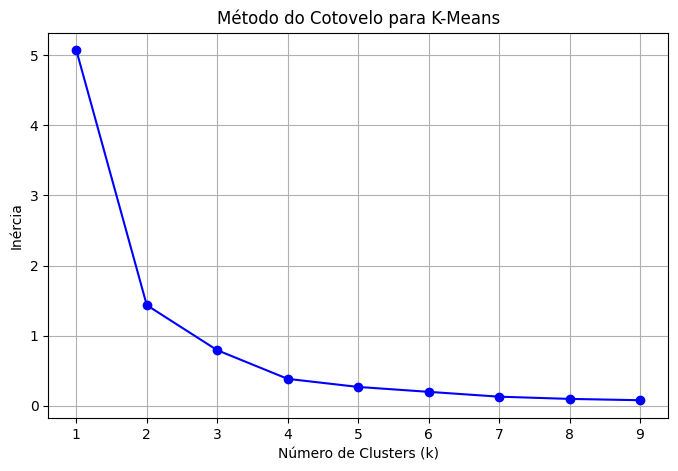

In [ ]:
df = dfr.copy()  # Cria uma cópia


# Converter coluna de preço para número
#df['preco'] = df['preco'].astype(str).str.replace(',', '.').astype(float)

# Normalizar os preços com MinMaxScaler
scaler = MinMaxScaler()
df['preco_normalizado'] = scaler.fit_transform(df[['preco']])


#iniciar o agrupamento
# Aplicar o método do cotovelo para encontrar o melhor número de clusters
inertia = []
K_range = range(1, 10)  # Testando de 1 a 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df[['preco_normalizado']])
    inertia.append(kmeans.inertia_)

# Gráfico do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para K-Means')
plt.xticks(K_range)
plt.grid()
plt.show()


In [ ]:
# Aplicar K-Means com o melhor número de clusters encontrado (realiza ajuste dos centróides)
#Distâncias Euclidianas (Soma da raiz quadrada da diferença). Mede a linha mais curta entre dois pontos
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df[['preco_normalizado']])

# Obter os centróides
centroides = kmeans.cluster_centers_
centroides_originais = scaler.inverse_transform(centroides)

print("Centróides dos clusters (valores originais de preço):")
print(centroides_originais)


Centróides dos clusters (valores originais de preço):
[[ 5663.81342593]
 [14974.27066667]
 [25958.13571429]]


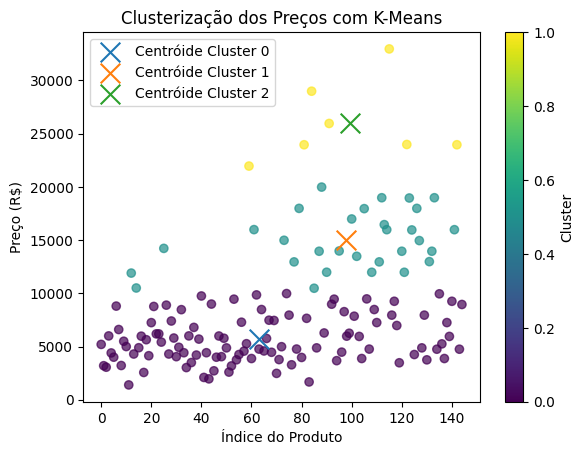

In [ ]:
#gráfico da clusterização
# Converter índices em array
plt.scatter(df.index, df['preco'], c=df['cluster'], cmap='viridis', alpha=0.7)

# Marcação dos centróides (média)
for cluster_id in df['cluster'].unique():
    cluster_indices = df.index[df['cluster'] == cluster_id].to_numpy()
    cluster_precos = df['preco'][df['cluster'] == cluster_id].to_numpy()
    plt.scatter(cluster_indices.mean(), cluster_precos.mean(),
                marker="x", s=200, label=f"Centróide Cluster {cluster_id}")

plt.xlabel("Índice do Produto")
plt.ylabel("Preço (R$)")
plt.title("Clusterização dos Preços com K-Means")
plt.colorbar(label="Cluster")
plt.legend()
plt.show()


# DBSCAN


In [ ]:
# Algorítmo DBSCAN: Baseada em densidade (número de clusters definidos dinamicamente)/
# Distância de Manhattan (soma das diferenças absolutas) ou outras

# Normalização
scaler_dbscan = StandardScaler() # valores. abs.
df['preco_scaled'] = scaler_dbscan.fit_transform(df[['preco']])

#eps (distância máxima para considerar pontos no mesmo cluster)
#min_samples (número mínimo de pontos para formar um cluster)
# teste 1
dbscan = DBSCAN(eps=0.1, min_samples=2)
df['cluster_dbscan'] = dbscan.fit_predict(df[['preco_scaled']])

# Visualizar os clusters identificados
print(df[['preco', 'cluster_dbscan']])

        preco  cluster_dbscan
0     5199.99               0
1     3199.99               0
2     3060.00               0
3     5999.00               0
4     4399.00               0
..        ...             ...
140   9250.40               0
141  15975.20               3
142  23950.85               6
143   4750.60               0
144   8950.25               0

[145 rows x 2 columns]


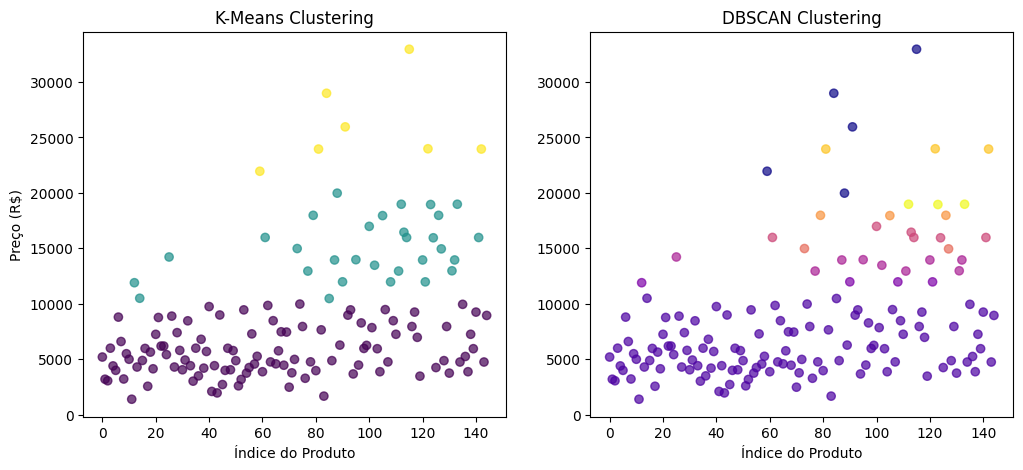

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# K-Means
axs[0].scatter(df.index, df['preco'], c=df['cluster'], cmap='viridis', alpha=0.7)
axs[0].set_title("K-Means Clustering")
axs[0].set_xlabel("Índice do Produto")
axs[0].set_ylabel("Preço (R$)")

# DBSCAN
axs[1].scatter(df.index, df['preco'], c=df['cluster_dbscan'], cmap='plasma', alpha=0.7)
axs[1].set_title("DBSCAN Clustering")
axs[1].set_xlabel("Índice do Produto")

plt.show()

In [ ]:
# Contagem de pontos por cluster
dbscan_counts = df['cluster_dbscan'].value_counts()
kmeans_counts = df['cluster'].value_counts()

print("Distribuição dos clusters - DBSCAN:")
print(dbscan_counts)

print("\nDistribuição dos clusters - K-Means:")
print(kmeans_counts)

#DBSCAN rotulou outlaiers como ruído e clusters desequilibrados: identifica pontos que não pertencem a nenhum cluster

Distribuição dos clusters - DBSCAN:
cluster_dbscan
 0    110
 2      9
 3      6
-1      5
 1      4
 5      3
 6      3
 7      3
 4      2
Name: count, dtype: int64

Distribuição dos clusters - K-Means:
cluster
0    108
1     30
2      7
Name: count, dtype: int64


In [ ]:
#Coeficiente de Variação (CV) - Tamanhos dos Clusters
# Razão entre o desvio padrão e a média. Quanto menor, melhor

cv_dbscan = np.std(dbscan_counts) / np.mean(dbscan_counts)
cv_kmeans = np.std(kmeans_counts) / np.mean(kmeans_counts)

print(f"Coeficiente de Variação - DBSCAN: {cv_dbscan:.2f}")
print(f"Coeficiente de Variação - K-Means: {cv_kmeans:.2f}")



Coeficiente de Variação - DBSCAN: 2.06
Coeficiente de Variação - K-Means: 0.89


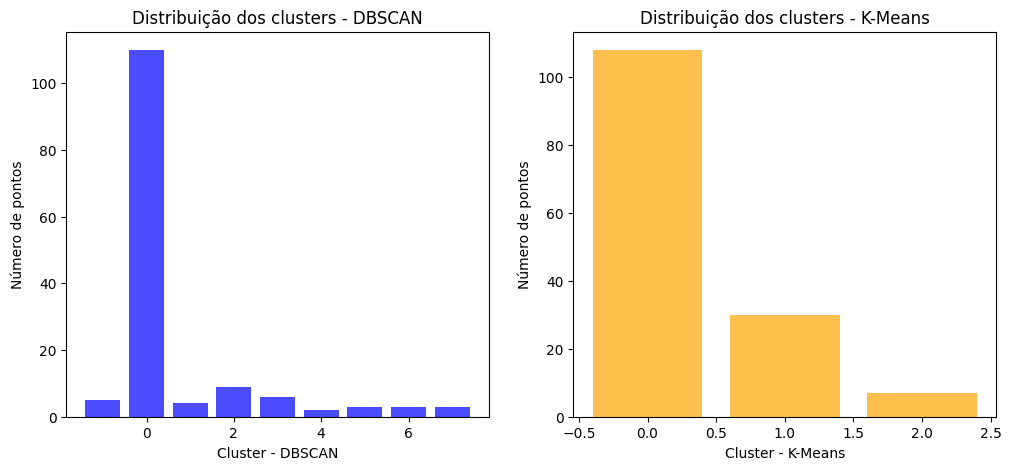

In [ ]:


# Gráfico para DBSCAN (clusters menos equilibrados)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(dbscan_counts.index, dbscan_counts.values, color='blue', alpha=0.7)
plt.xlabel("Cluster - DBSCAN")
plt.ylabel("Número de pontos")
plt.title("Distribuição dos clusters - DBSCAN")

# Gráfico para K-Means (clusters mais equilibrados)
plt.subplot(1, 2, 2)
plt.bar(kmeans_counts.index, kmeans_counts.values, color='orange', alpha=0.7)
plt.xlabel("Cluster - K-Means")
plt.ylabel("Número de pontos")
plt.title("Distribuição dos clusters - K-Means")

plt.show()



In [ ]:
#Silhueta DBSCAN X KMeans - qualidade dos agrupamentos
#Proximos a 1

# Calcular a métrica apenas para os clusters válidos (DBSCAN pode ter rótulos -1 para outliers)
if len(set(df['cluster_dbscan'])) > 1:

    score_kmeans = silhouette_score(df[['preco_normalizado']], df['cluster'])
    score_dbscan = silhouette_score(df[['preco_scaled']], df['cluster_dbscan'])
    print(f"Silhouette Score - KMeans: {score_kmeans:.3f}")
    print(f"Silhouette Score - DBSCAN: {score_dbscan:.3f}")
else:
    print("DBSCAN não encontrou clusters suficientes para calcular Silhouette Score.")

Silhouette Score - KMeans: 0.672
Silhouette Score - DBSCAN: 0.509


# Conclusão
Kmeans apresentou menor coeficiente de variação,indicando clusters mais homogêneos e centróides bem definidos


Nova observação (R$30000.00) pertence ao Cluster 1 (Intermediário)


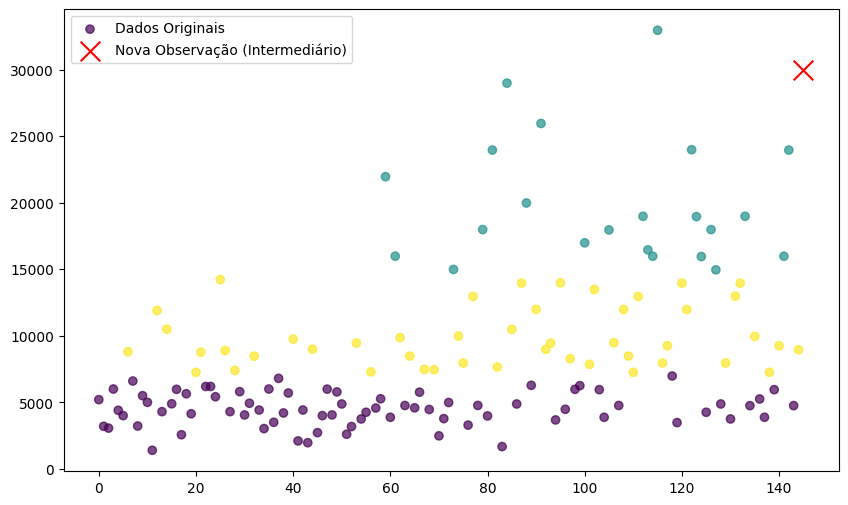

In [ ]:

#teste
X = df[['preco']].values

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Treinar o modelo K-Means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto") #Número de ajustes dos centróides
df['cluster'] = kmeans.fit_predict(X_scaled)

# Dicionário para nomear os clusters
cluster_names = {0: "Econômico", 1: "Intermediário", 2: "Premium"}

# Testar uma nova observação
new_observation = np.array([[30000.0]])  # Nova observação
new_observation_scaled = scaler.transform(new_observation)  # Normalizar a nova observação
new_cluster = kmeans.predict(new_observation_scaled)[0]  # Prever o cluster

# Obter o nome do cluster
cluster_label = cluster_names.get(new_cluster, "Desconhecido")

print(f"\nNova observação (R${new_observation[0][0]:.2f}) pertence ao Cluster {new_cluster} ({cluster_label})")

# Visualização dos dados e da nova observação
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['preco'], c=df['cluster'], cmap='viridis', alpha=0.7, label='Dados Originais')
plt.scatter(len(df), new_observation[0][0], c='red', s=200, marker='x', label=f'Nova Observação ({cluster_label})')

plt.legend()
plt.show()


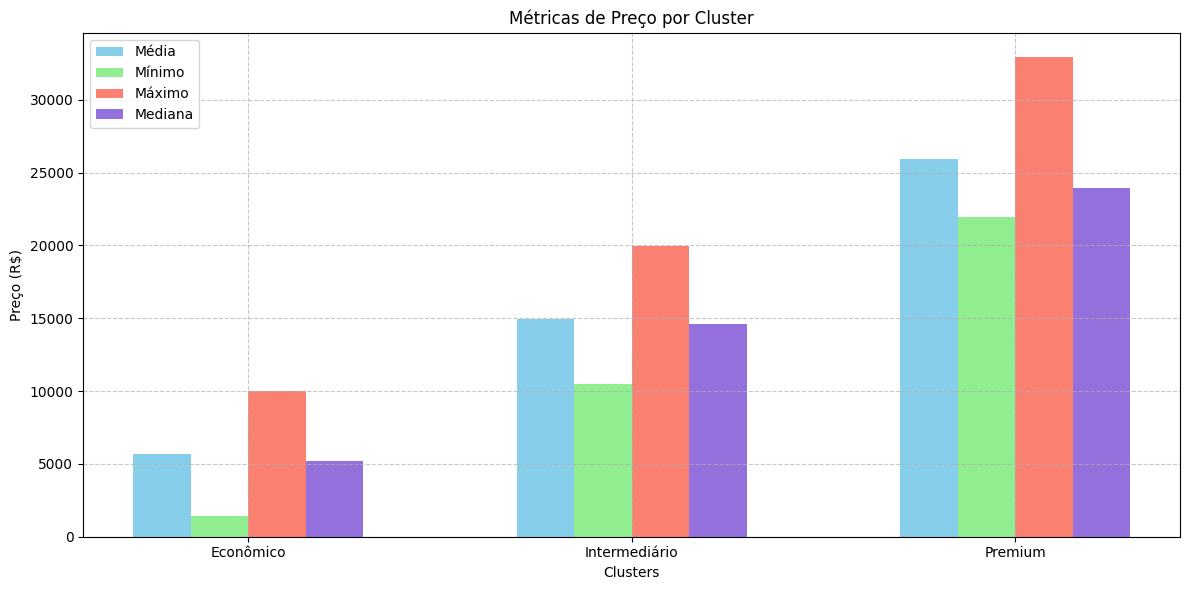


Estatísticas por Cluster:
    cluster_name  count      mean       min      max    median
0      Econômico    108   5663.81   1395.81   9975.5   5225.17
1  Intermediário     30  14974.27  10475.60  19975.0  14584.92
2        Premium      7  25958.14  21950.00  32950.0  23975.50


In [ ]:
# métricas
X = df[['preco']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=20)
df['cluster'] = kmeans.fit_predict(X_scaled)
cluster_names = {0: "Econômico", 1: "Intermediário", 2: "Premium"}

# Calcular métricas por cluster
cluster_stats = df.groupby('cluster')['preco'].agg(['mean', 'min', 'max']).reset_index()
cluster_stats['cluster_name'] = cluster_stats['cluster'].map(cluster_names)

# Adicionar métricas adicionais (exemplo: mediana e contagem)
cluster_stats['median'] = df.groupby('cluster')['preco'].median().values
cluster_stats['count'] = df.groupby('cluster')['preco'].count().values

# Criar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Posições das barras
x = np.arange(len(cluster_stats))
width = 0.15

# Plotar as barras para cada métrica
ax.bar(x - width*1.5, cluster_stats['mean'], width, label='Média', color='skyblue')
ax.bar(x - width/2, cluster_stats['min'], width, label='Mínimo', color='lightgreen')
ax.bar(x + width/2, cluster_stats['max'], width, label='Máximo', color='salmon')
ax.bar(x + width*1.5, cluster_stats['median'], width, label='Mediana', color='mediumpurple') # Changed color to 'mediumpurple' or any valid matplotlib color

# Personalizar o gráfico
ax.set_xlabel('Clusters')
ax.set_ylabel('Preço (R$)')
ax.set_title('Métricas de Preço por Cluster')
ax.set_xticks(x)
ax.set_xticklabels(cluster_stats['cluster_name'])
ax.legend()

# Adicionar grid para melhor leitura
ax.grid(True, linestyle='--', alpha=0.7)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

# Exibir as métricas em forma de tabela
print("\nEstatísticas por Cluster:")
print(cluster_stats[['cluster_name', 'count', 'mean', 'min', 'max', 'median']].round(2))